# Support Vector Machine(SVM)


References
- https://cvxopt.org/examples/tutorial/qp.html
- https://xavierbourretsicotte.github.io/SVM_implementation.html

> <img src='https://drive.google.com/uc?export=view&id=1s2OcjoXIt5VLfASNvzlOkJANAzs5nBAc' width=450>

## Hard-margin SVM

## 1. Load Data

In [10]:
X = []
Y = []

with open('./data/iris.data') as f:
    lines = f.readlines()
    for line in lines:
        if line[16:] == 'Iris-setosa\n':
            Y.append(1)
        elif line[16:] == 'Iris-versicolor\n':
            Y.append(-1)
        else:
            continue
        X.append([float(line[0:3]), float(line[4:7])])
X = np.array(X).T
Y = np.array(Y)


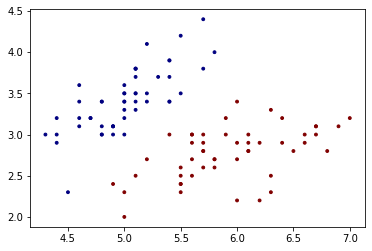

In [11]:
plt.scatter(X[0, :], X[1, :], c=-Y, cmap='jet', s=8)
plt.show()

## 2. Define a Quadratic Problem Solver

$\displaystyle\mathbf{\min_{x} \frac{1}{2}x^\top Q x + c^\top x}$\
$s.t.$\
$\mathbf{Ax+b \preceq 0}$ (Inequality constraint)\
$\mathbf{Ex = d}$ (Equality constraint)

In [12]:
def qp_solver(Q, c, A, b, E, d):
    Q = Q.astype(float)
    E = E.astype(float)
    P = cvxopt_matrix(Q)
    q = cvxopt_matrix(c)
    G = cvxopt_matrix(A)
    h = cvxopt_matrix(b)
    A = cvxopt_matrix(E)
    b = cvxopt_matrix(d)

    cvxopt_solvers.options['show_progress'] = False
    cvxopt_solvers.options['abstol'] = 1e-10
    cvxopt_solvers.options['reltol'] = 1e-10
    cvxopt_solvers.options['feastol'] = 1e-10


    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    lambdas = np.array(sol['x'])
    return lambdas

## 3. Define a Loss Function using Duality (TODO)

$\displaystyle \max_{\lambda_i}\sum\lambda_i - \frac{1}{2} \sum_i \sum_j \lambda_i \lambda_j y_i y_j \mathbf{x_i^\top x_j}$\
$s.t.$\
$\lambda_i\ge 0$\
$\displaystyle\sum_i \lambda_i y_i=0$

### is equal to 

$\displaystyle\mathbf{\min_\lambda \frac{1}{2}\lambda^\top Q \lambda - 1^\top\lambda}$\
$s.t.$\
$\mathbf{-I\lambda}\preceq \mathbf{0}$\
$\mathbf{y^\top \lambda}=0$

where

$\mathbf{Q=X'X'^\top,\ \ X'=X^\top \odot y}$ (Python automatically broadcasts $\mathbf{y}$ to $\mathbf{X^\top}$)

In [13]:
""" Fill in the blanks by referring to the equations above """

m = X.shape[1] # Number of datapoints
X_prime = X.T * np.reshape(Y,(m,1))
Q = X_prime @ X_prime.T
c = np.ones((m,1)) * (-1)
A = np.eye(m) * (-1)
b = np.zeros(m)
E = Y.reshape(-1,1).T
d = np.zeros(1)

lambdas = qp_solver(Q, c, A, b, E, d)

## 4. Compute w and b (TODO)

$\displaystyle \mathbf{w}= \sum_i \lambda_i y_i \mathbf{x_i}\Leftrightarrow\mathbf{w=(y\odot\lambda)^\top X^\top}$ \
$b = y_i - \mathbf{w^\top x_i} \ \forall i$ (Compute b only for support vectors and take mean using np.mean function)

In [14]:
""" Fill in the blanks by referring to the equations above """

support_vectors = (lambdas > 1e-4).flatten() # Indices of support vectors

In [15]:
w = (Y.reshape(100,1)*lambdas).T @ X.T
b = []
for i in range(0, m):
    if support_vectors[i] == True :
        b.append(Y[i] - w @ X[:,i])
        
b = np.mean(b) 
print(b)
print(w)

17.315789473681495
[[-6.31578947  5.26315789]]


## 5. Plot Decision Boundary

In [16]:
def plot_svm(X, Y, w, b):
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.sign(np.matmul(w.flatten(), np.concatenate((xx.reshape(1, -1), yy.reshape(1, -1)), axis=0)) + b)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='Spectral')
    plt.scatter(X[0, :], X[1, :], c=-Y, cmap='jet', s=8)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.show()

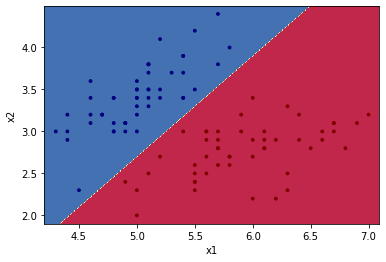

In [17]:
plot_svm(X, Y, w, b)

## Soft-margin SVM

## 1. Load Data

In [22]:
X = []
Y = []

with open('iris.data') as f:
    lines = f.readlines()
    for line in lines:
        if line[16:] == 'Iris-virginica\n':
            Y.append(1)
        elif line[16:] == 'Iris-versicolor\n':
            Y.append(-1)
        else:
            continue
        X.append([float(line[4:7]), float(line[12:15])])
X = np.array(X).T
Y = np.array(Y)

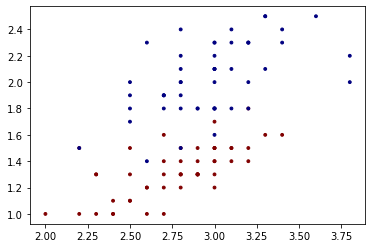

In [23]:
plt.scatter(X[0, :], X[1, :], c=-Y, cmap='jet', s=8)
plt.show()

## 2. Define a Loss Function using Duality (TODO)

$\displaystyle \max_{\lambda_i}\sum\lambda_i - \frac{1}{2} \sum_i \sum_j \lambda_i \lambda_j y_i y_j \mathbf{x_i^\top x_j}$\
$s.t.$\
$0\le\lambda_i\le C$\
$\displaystyle\sum_i \lambda_i y_i=0$

### is equal to 

$\displaystyle\mathbf{\min_\lambda \frac{1}{2}\lambda^\top Q \lambda - 1^\top\lambda}$
$s.t.$\
$\mathbf{-I\lambda}\preceq \mathbf{0}$\
$\mathbf{I\lambda}\preceq C\mathbf{1}$ (Hint: use np.vstack and np.hstack function to concatenate these two affine constraints)\
$\mathbf{y^\top \lambda}=0$

where

$\mathbf{Q=X'X'^\top,\ \ X'=X^\top \odot y}$ (Python automatically broadcasts $\mathbf{y}$ to $\mathbf{X^\top}$)

In [35]:
""" Fill in the blanks by referring to the equations above """

C = 1

m = X.shape[1] # Number of datapoints

X_prime = X.T * np.reshape(Y,(m,1))
Q = X_prime @ X_prime.T
c = np.ones((m,1)) * (-1)
A = np.vstack([np.eye(m) * (-1), np.eye(m)])
b = np.vstack([np.zeros((m,1)), np.ones((m,1)) * C ]) 
E = Y.reshape(-1,1).T
d = np.zeros(1)

lambdas = qp_solver(Q, c, A, b, E, d)

## 3. Compute w and b (TODO)

$\displaystyle \mathbf{w}= \sum_i \lambda_i y_i \mathbf{x_i}\Leftrightarrow\mathbf{w=(y\odot\lambda)^\top X^\top}$ \
$b = y_i - \mathbf{w^\top x_i} \ \forall i$ (Compute b only for support vectors and take mean using np.mean function)

In [36]:
""" Fill in the blanks by referring to the equation above """

support_vectors = (lambdas > 1e-4).flatten() # Indices of support vectors
w = (Y.reshape(100,1)*lambdas).T @ X.T
b = []
for i in range(0, m):
    if support_vectors[i] == True :
        b.append(Y[i] - w @ X[:,i])
        
b = np.mean(b) 
print(b)
print(w)

-4.463497453304186
[[-0.64516129  3.87096774]]


## 4. Plot a Decision Boundary

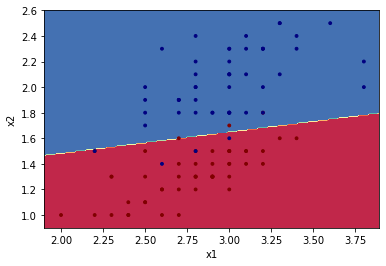

In [37]:
plot_svm(X, Y, w, b)

## Appendix

#### Feel free to use cells below to further analyse data